<a href="https://colab.research.google.com/github/betsyvies/forest-fires/blob/main/dry_bean_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [233]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [234]:
# forest_fires = "/content/drive/MyDrive/Data science/Projects/Project 2/banana_quality.csv"
path = "/content/drive/MyDrive/Data science/Projects/Project 2/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(path)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### Cantidad de filas y columnas

Para saber la cantidad de columnas y filas usaré la propiedad .shape. Esta me muestra que hay **13611 filas y 17 columnas**.

In [235]:
df.shape

(13611, 17)

### Tipos de datos de cada variable
Para saber los tipos de datos usaré la propiedad .dtypes y el método .unique porque no quiero que se repitan. Este me muestra que se utilizan tres tipos de datos para las variables. Estos son **float, int, y object.**

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

### Revisión de valores duplicados
Para esto utilizo la función .duplicated y la función .sum para saber el total. Puedo ver que son 68 las filas con valores duplicados, así que procederé a eliminarlos.

In [237]:
df.duplicated().sum()

68

In [238]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Revisión de valores faltantes

Me aseguro que no hay valores faltantes en las diferentes columnas de data set.

In [239]:
df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### Revisión de data points inusuales

#### Características categóricas
Dado que la única columna con elemento categorico es quality procedere a evaluar esta primero, viendo si tiene datos inconsistentes. Se puede apreciar que hay 7 categorias BARBUNYA, BOMBAY, CALI, DERMASON, HOROZ, SEKER, SIRA. No hay datos inconsistentes.

In [240]:
df["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

## Exploración de los datos

### Medidas estadísticas
Usaré el método .describe por quiero ver las estadisticas descriptivas de forma resumida.

Se puede ver que el frijol con redondez y solidez máxima es de 1, también que el promedio del área convexa es de 53768 y el promedio del area de la zona del frijol es  53048. Estos datos son muy similares lo que me hace pensar que deben tener una correlación bastante alta.

Para seguir con la exploración de los datos empleare los gráficos.

In [241]:
df.describe().round()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0,13543.0
mean,53048.0,855.0,320.0,202.0,2.0,1.0,53768.0,253.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
std,29392.0,215.0,86.0,45.0,0.0,0.0,29844.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,20420.0,525.0,184.0,123.0,1.0,0.0,20684.0,161.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25%,36282.0,703.0,253.0,176.0,1.0,1.0,36673.0,215.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
50%,44580.0,794.0,296.0,192.0,2.0,1.0,45122.0,238.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
75%,61382.0,977.0,376.0,217.0,2.0,1.0,62360.0,280.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
max,254616.0,1985.0,739.0,460.0,2.0,1.0,263261.0,569.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0


#### Histograma

Se puede observar que hay una **mayor cantidad de frijol seco** en la categoria **DERMASON** y una **menor cantidad de frijol seco** en **BOMBAY**. Se podría deducir que el tipo de frijol **BOMBAY** es el de menos proporcion de datos de los que están en el dataset.

In [242]:
dry_bean = df["Class"]

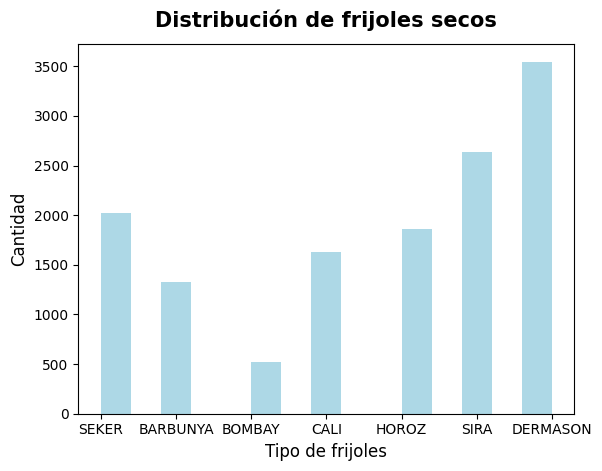

In [243]:
plt.hist(dry_bean, bins=15, color='lightblue')

plt.xlabel('Tipo de frijoles', fontsize = 12);
plt.ylabel('Cantidad', fontsize = 12);
plt.title('Distribución de frijoles secos', fontsize = 15, pad=12, weight= 'bold')

plt.show()

#### Mapa de calor

Aplicamos este gráfico para encontrar correlación entre nuestras variables númericas y el target. Para esto primero haré el reemplazo de Good a 1 y Bad a 0.

Podemos ver que hay una ***correlación moderada baja*** entre el **size**, **weight**, **sweetness**, **harvest time**, **ripeness** y el **target (quality)**. También hay una ***correlación moderada baja*** entre **acidity** y **weight**, como también **sweetness** y **weight**. Por otro lado. hay una ***correlación moderada*** entre el **size** y el **harvest time**.

Al tener una correlación moderada entre el **size y harvest time**, podríamos decir que podría haber una relación causal indirecta entre el tamaño y el tiempo de cosecha de los plátanos. Por ejemplo, un mayor tamaño de los plátanos podría requerir un tiempo de crecimiento más largo antes de la cosecha.

In [244]:
df['Class'] = df['Class'].replace({'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6})
corr = df.corr()

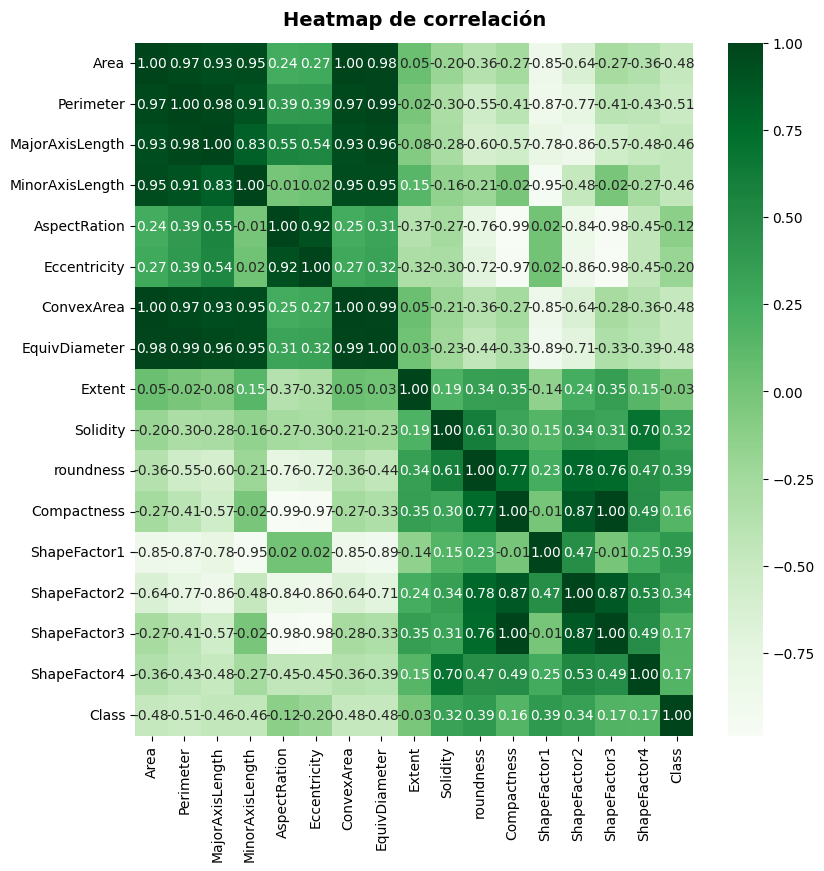

In [245]:
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True, cmap = 'Greens', fmt=".2f")

# Add title
plt.title('Heatmap de correlación', pad=12.5, weight='bold', fontsize=14)

# Show graphic
plt.show()